#  
<html>

<head>
<style>
body {
  background-color:#E7E9EB;
}
#myDIV {
  /* height:300px; */
  /* background-color:#FFFFFF; */
  text-align: right;
}
</style>
</head>
<body>


<div id="myDIV">
<h1>فراخوانی دیتاست</h1>

In [152]:
import pandas as pd
import os
from datetime import datetime
from joblib import dump


In [153]:
path = "PRSA_Data_20130301-20170228"
dict_of_dfs = {} # To grab all dataframes, we put each dataframe as a value in a dictionary
        # which's key is city name.
for add in os.listdir(path= path): # Grab address for each table
        dict_of_dfs[add.split("_")[2]] = pd.read_csv(path+"/" +add , parse_dates={"date" : ["year","month" ,"day" , "hour"]  }  , index_col= "date" 
        ,date_parser=lambda x: datetime.strptime(x, '%Y %m %d %H') ) # Extract city name from address and set it as key
        

In [154]:
dict_of_dfs.keys() # Keys of this dictionary are city names

dict_keys(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'])

In [155]:
dict_of_dfs["Aotizhongxin"]  # a demo of Aotizhongxin data

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28 20:00:00,35061,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28 21:00:00,35062,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


#  
<html>

<head>
<style>
body {
  background-color:#E7E9EB;
}
#myDIV {
  /* height:300px; */
  /* background-color:#FFFFFF; */
  text-align: right;
}
</style>
</head>
<body>


<div id="myDIV">
<h1>پیش پردازش </h1>

##  
<html>

<head>
<style>
body {
  background-color:#E7E9EB;
}
#myDIV {
  /* height:300px; */
  /* background-color:#FFFFFF; */
  text-align: left;
}
</style>
</head>
<body>


<div id="myDIV">
<h1>Missing Values</h1>

In [156]:
dict_of_dfs["Aotizhongxin"].isna().sum() # missing values for Aotizhongxin

No            0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [157]:
for city in dict_of_dfs.keys():
    dict_of_dfs[city] = dict_of_dfs[city].interpolate("time")

In [158]:
dict_of_dfs["Aotizhongxin"].isna().sum() # unless for wd , filled all values.

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

##  
<html>

<head>
<style>
body {
  background-color:#E7E9EB;
}
#myDIV {
  /* height:300px; */
  /* background-color:#FFFFFF; */
  text-align: left;
}
</style>
</head>
<body>


<div id="myDIV">
<h1>Encoding Categorical Variable</h1>

In [159]:
wd_encoding = {"N" : 0,"NNE" : 22.5,"NE" : 45,"ENE" : 67.5,
"E" : 90,"ESE" : 112.5,"SE" : 135,"SSE" : 157.5,
"S" : 180,"SSW" : 202.5,"SW" : 225,"WSW" : 247.5,
"W" : 270,"WNW" : 292.5,"NW" : 315,"NNW" : 337.5}

In [160]:
for city in dict_of_dfs.keys():
    dict_of_dfs[city]["wd"] = dict_of_dfs[city]["wd"].map(wd_encoding)

In [161]:
dict_of_dfs["Changping"]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,90.0,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,67.5,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,67.5,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,22.5,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,0.0,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,28.0,47.0,4.0,14.0,300.0,33.0,11.7,1008.9,-13.3,0.0,22.5,1.3,Changping
2017-02-28 20:00:00,35061,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,0.0,2.1,Changping
2017-02-28 21:00:00,35062,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,0.0,1.5,Changping


In [162]:
# Now that wd is numerical we can use linear interpolation to fill the 81 missing records.
# We could either use ffill for that. But I'd rather use interpolation based on time.

In [163]:
for city in dict_of_dfs.keys():
    dict_of_dfs[city].interpolate("time" , inplace = True)

In [164]:
dict_of_dfs["Aotizhongxin"].isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##  
<html>

<head>
<style>
body {
  background-color:#E7E9EB;
}
#myDIV {
  /* height:300px; */
  /* background-color:#FFFFFF; */
  text-align: left;
}
</style>
</head>
<body>


<div id="myDIV">
<h1>Nomarlization and Train Test Splitting</h1>

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
dict_of_dfs["Aotizhongxin"].head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0,Aotizhongxin


In [167]:
scaler = MinMaxScaler()

In [168]:
PMS_df = pd.DataFrame()
for city in dict_of_dfs.keys():
    temp = pd.DataFrame(dict_of_dfs[city]["PM2.5"])
    temp.columns = ["PM2.5" + " " + city[:4]]
    PMS_df = pd.concat((PMS_df,temp),axis=1)

In [169]:
PMS_df.head(1)

,PM2.5 Aoti,PM2.5 Chan,PM2.5 Ding,PM2.5 Dong,PM2.5 Guan,PM2.5 Guch,PM2.5 Huai,PM2.5 Nong,PM2.5 Shun,PM2.5 Tian,PM2.5 Wanl,PM2.5 Wans
date,,,,,,,,,,,,
2013-03-01,4.0,3.0,4.0,9.0,4.0,6.0,7.0,5.0,3.0,6.0,8.0,9.0


In [170]:
PMS_df.drop("PM2.5 Aoti" , axis=1 , inplace = True)

In [171]:
rows , cols = dict_of_dfs["Aotizhongxin"].shape

In [172]:
index_80_percent = int(rows*0.8)

In [173]:
other_features = dict_of_dfs["Aotizhongxin"].drop(["No","O3" ,"NO2","SO2","PM2.5" , "station"],axis=1)

Features = pd.concat((PMS_df ,other_features ),axis=1)

In [174]:
Features_df_Train_set = Features.iloc[: index_80_percent]
Features_df_Test_set = Features.iloc[index_80_percent :]

In [175]:
Features_df_Test_set

,PM2.5 Chan,PM2.5 Ding,PM2.5 Dong,PM2.5 Guan,PM2.5 Guch,PM2.5 Huai,PM2.5 Nong,PM2.5 Shun,PM2.5 Tian,PM2.5 Wanl,PM2.5 Wans,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,,,,,,,,
2016-05-12 19:00:00,23.0,61.0,4.0,12.0,20.0,10.0,8.0,11.0,14.0,9.0,4.333333,36.0,300.0,20.3,1011.7,-5.6,0.0,337.50,2.2
2016-05-12 20:00:00,17.0,20.0,33.0,21.0,28.0,16.0,15.0,23.0,21.0,22.0,5.666667,52.0,400.0,17.4,1012.6,0.1,0.0,337.50,0.6
2016-05-12 21:00:00,19.0,22.0,66.0,28.0,38.0,19.0,23.0,27.0,15.0,27.0,7.000000,77.0,500.0,14.7,1013.8,1.6,0.0,225.00,0.5
2016-05-12 22:00:00,21.0,10.0,54.0,39.0,70.0,15.0,25.0,21.0,10.0,40.0,8.000000,126.0,800.0,12.8,1014.4,2.6,0.0,258.75,0.0
2016-05-12 23:00:00,19.0,14.0,48.0,40.0,48.0,13.0,45.0,22.0,20.0,34.0,60.000000,118.0,800.0,11.2,1014.6,4.6,0.0,292.50,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,28.0,11.0,16.0,13.0,14.0,16.0,14.0,27.0,20.0,11.0,11.000000,29.0,400.0,12.5,1013.5,-16.2,0.0,315.00,2.4
2017-02-28 20:00:00,12.0,13.0,18.0,20.0,27.0,21.0,18.0,47.0,11.0,15.0,13.000000,37.0,500.0,11.6,1013.6,-15.1,0.0,292.50,0.9
2017-02-28 21:00:00,7.0,9.0,23.0,16.0,22.0,17.0,15.0,18.0,18.0,13.0,14.000000,37.0,700.0,10.8,1014.2,-13.3,0.0,315.00,1.1


In [176]:
col_names = Features.columns
dates_train = Features_df_Train_set.index
dates_test = Features_df_Test_set.index

In [177]:

Features_Train_Norm = scaler.fit_transform(Features_df_Train_set)
Features_Test_Norm = scaler.transform(Features_df_Test_set)


Features_Train_Norm_df = pd.DataFrame(Features_Train_Norm)
Features_Train_Norm_df.columns = col_names
Features_Train_Norm_df.set_index(dates_train,inplace=True)

Features_Test_Norm_df = pd.DataFrame(Features_Test_Norm)
Features_Test_Norm_df.columns = col_names
Features_Test_Norm_df.set_index(dates_test,inplace=True)

dump(scaler, 'MinMaxScaler.joblib')

['MinMaxScaler.joblib']

In [178]:
Train_df = pd.concat((Features_Train_Norm_df , dict_of_dfs["Aotizhongxin"]["PM2.5"].loc[dates_train]) , axis=1)

Test_df = pd.concat((Features_Test_Norm_df , dict_of_dfs["Aotizhongxin"]["PM2.5"].loc[dates_test]) , axis=1)


In [179]:
Train_df.to_csv("train.csv" ,date_format  = "%Y-%m-%d %H:%M:%S" )
Test_df.to_csv("test.csv" ,date_format  = "%Y-%m-%d %H:%M:%S" )

##  
<html>

<head>
<style>
body {
  background-color:#E7E9EB;
}
#myDIV {
  /* height:300px; */
  /* background-color:#FFFFFF; */
  text-align: left;
}
</style>
</head>
<body>


<div id="myDIV">
<h1>Pearson Correlation</h1>

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

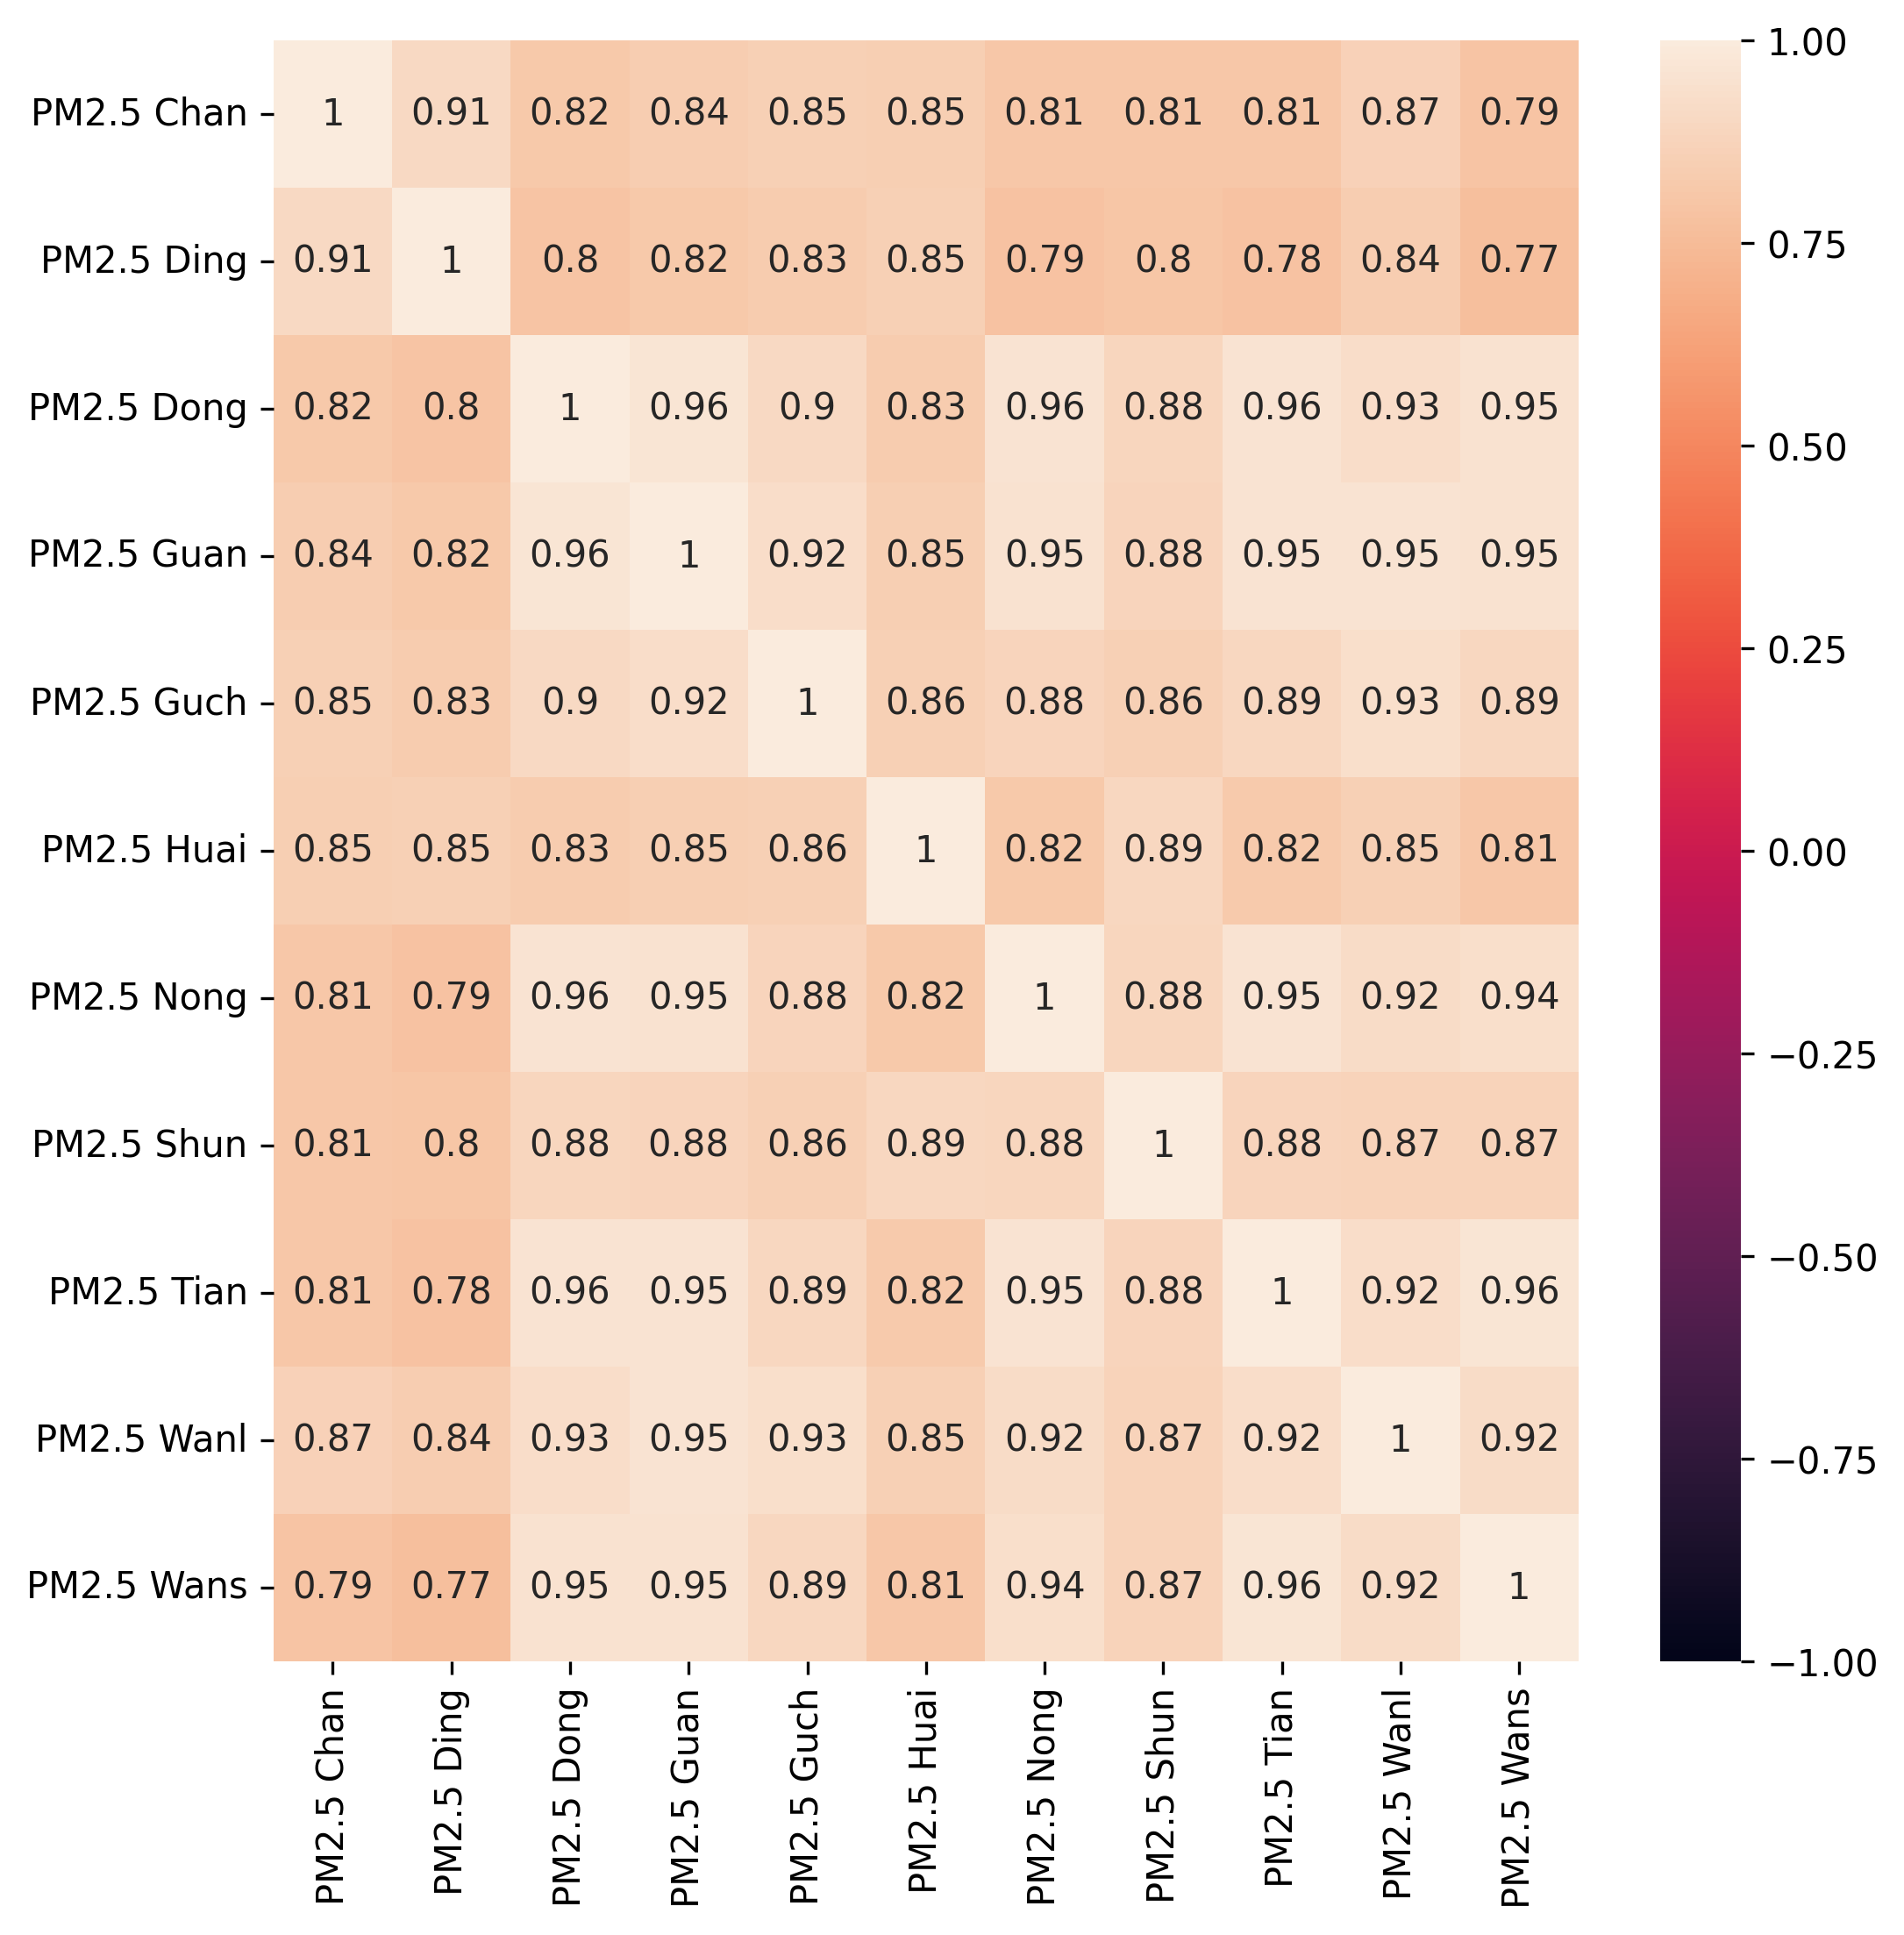

In [181]:
fig,ax = plt.subplots(1,1,figsize = (8,8) , dpi = 300)
ax = sns.heatmap(PMS_df.corr(),annot = True,vmax= 1 , vmin=-1)